In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.drop("Id",axis = 1, inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


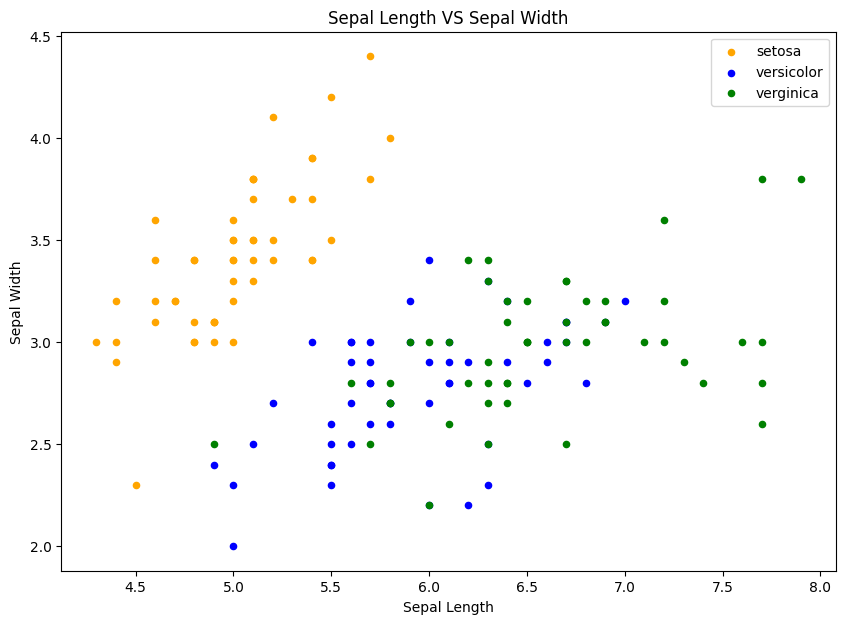

In [9]:
fig = iris[iris.Species == "Iris-setosa"].plot(kind = 'scatter', x='SepalLengthCm',y='SepalWidthCm',color='orange',label ='setosa' )
iris[iris.Species == "Iris-versicolor"].plot(kind = 'scatter', x='SepalLengthCm',y='SepalWidthCm',color='blue',label ='versicolor',ax=fig)
iris[iris.Species == "Iris-virginica"].plot(kind = 'scatter', x='SepalLengthCm',y='SepalWidthCm',color='green',label ='verginica',ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()


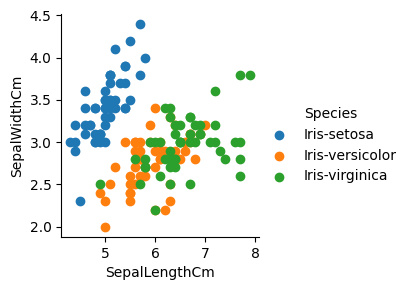

In [14]:
sns.FacetGrid(iris, hue = 'Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()


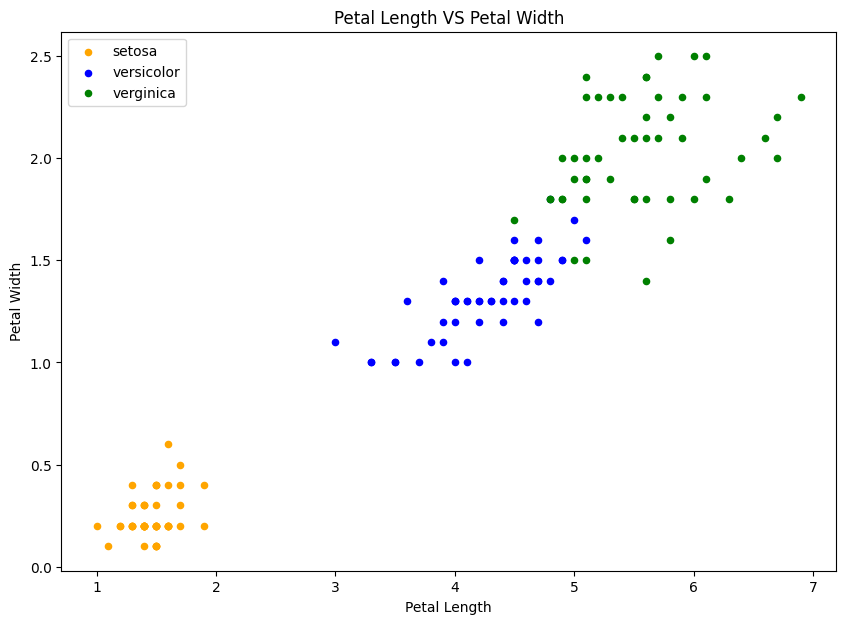

In [13]:
fig = iris[iris.Species == "Iris-setosa"].plot(kind = 'scatter', x='PetalLengthCm',y='PetalWidthCm',color='orange',label ='setosa' )
iris[iris.Species == "Iris-versicolor"].plot(kind = 'scatter', x='PetalLengthCm',y='PetalWidthCm',color='blue',label ='versicolor',ax=fig)
iris[iris.Species == "Iris-virginica"].plot(kind = 'scatter', x='PetalLengthCm',y='PetalWidthCm',color='green',label ='verginica',ax=fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Petal Width")

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()


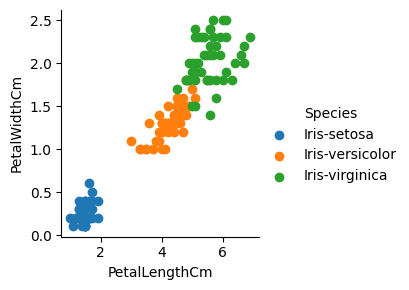

In [17]:
sns.FacetGrid(iris, hue = 'Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()


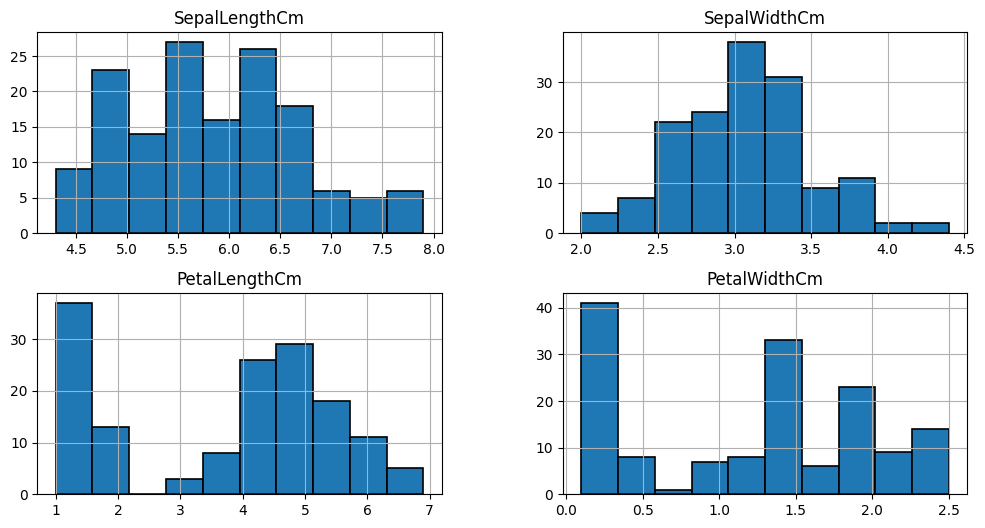

In [18]:
iris.hist(edgecolor='black',linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [20]:
iris.shape

(150, 5)

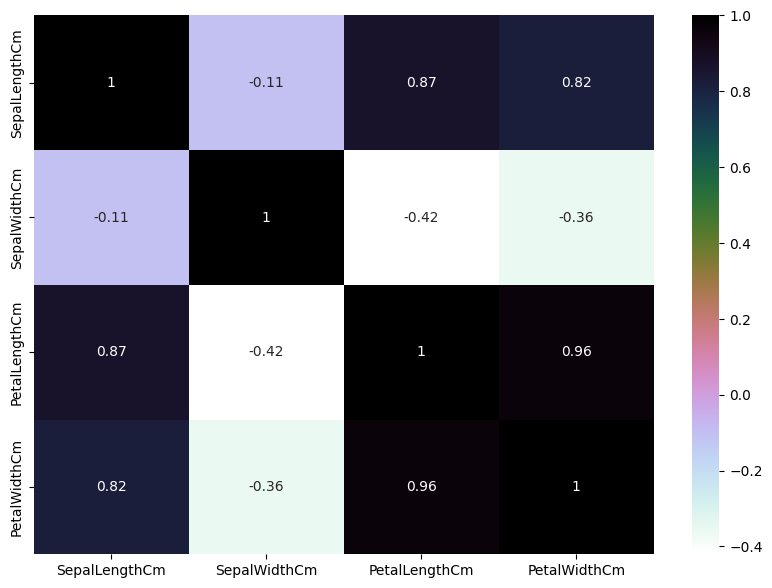

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(iris.corr(),annot = True, cmap = "cubehelix_r")
plt.show()

In [25]:
train,test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [26]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species

test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species


In [28]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
72,6.3,2.5,4.9,1.5
118,7.7,2.6,6.9,2.3
101,5.8,2.7,5.1,1.9
103,6.3,2.9,5.6,1.8
4,5.0,3.6,1.4,0.2


In [29]:
test_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
135,7.7,3.0,6.1,2.3
148,6.2,3.4,5.4,2.3
34,4.9,3.1,1.5,0.1
91,6.1,3.0,4.6,1.4
104,6.5,3.0,5.8,2.2


##5. Classifiers 

In [44]:
#SVM
model = svm.SVC()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print("The Accuracy of SVM is:",metrics.accuracy_score(prediction,test_y))

The Accuracy of SVM is: 0.9555555555555556


In [45]:
# Logistic Regression

model1 = LogisticRegression()
model1.fit(train_x,train_y)
prediction = model1.predict(test_x)
print("The Accuracy of LR is:",metrics.accuracy_score(prediction,test_y))

The Accuracy of LR is: 0.9333333333333333


In [46]:
#Decision tree
model2 = DecisionTreeClassifier()
model2.fit(train_x, train_y)
prediction = model2.predict(test_x)
print("The Accuracy of DT is:",metrics.accuracy_score(prediction,test_y))


The Accuracy of DT is: 0.9333333333333333


In [47]:
#KNN

model3 = KNeighborsClassifier()
model3.fit(train_x, train_y)
prediction = model3.predict(test_x)
print("The Accuracy of KNN is:",metrics.accuracy_score(prediction,test_y))


The Accuracy of KNN is: 0.9777777777777777
